# **Credit Risk Modeling Project**

### **Setting the Background**

## Background of Credit Risk Modeling

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. It is the probability that the lender will not receive the principal and interest payments of a debt required to service the debt extended to a borrower.

On the side of the lender, credit risk will disrupt its cash flows and also increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Financial institutions used credit risk analysis models to determine the probability of default of a potential borrower. The models provide information on the level of a borrower’s credit risk at any particular time. If the lender fails to detect the credit risk in advance, it exposes them to the risk of default and loss of funds. Lenders rely on the validation provided by credit risk analysis models to make key lending decisions on whether or not to extend credit to the borrower and the credit to be charged.

## Background of Machine Learning in Credit Risk Modeling - Why ML?


The most pressing questions for banks are how efficiently can we guage the risk profile of our customers and how can we use this information to decide on the required liquidity while still maintaining our regulatory obligations. 
With the constantly changing customer portfolio and the ever increasing customer base a more robust non-hardcoded approach is neccessary to achieve these antagonistic goals. 

Thus comes the idea of using machine learning to develop a behavioural scorecard to pull data from both internal sources, customer transactions and their demographic data, to predict the probability of default. 

Under machine and deep learning analysis, banks are now able to carry out a complex task like credit risk predictions, monitoring, model reliability, and predicting loan default probability. Machine learning algorithms enhance predictive abilities and can, therefore, help the lenders receive real-time insights about their current and potential borrowers. This shall allow them to disburse loans to the right set of clients, especially in countries with little or no past credit information.

Machine learning helps in maintaining transparency and improves overall accuracy by detecting instances of fraudulent activities or any potential anomalies taking place. It is also not new for banks to continually review high-risk accounts.

In this notebook we are going to explore the data cleaning and transformation as well as machine learing modeling in predicting probability of default. We will then use these results to develop a credit rating.

Further we will explore the callibration and validation of the developed model to assess compliance with industry benchmarks and regulatory requirements.

We will eplore the following concepts in the notebook

1.   Data cleaning - Structuring the data for modeling
2.   What to do with missing values
3.   How to deal with class imbalance and the implications.
4.   How to choose the most appropriate modeling technique based on the reporting expectations

## **Data Understanding**


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm
from google.colab import files
import missingno

In [2]:
#Loading data 
Loan = pd.read_csv("https://raw.githubusercontent.com/chaptrbootcamps/MACHINE-LEARNING-PROJECTS/main/CLASSIFICATION%20PROJECTS/Credit%20Risk%20Modelling%20Project/raw-data.csv")
Loan.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,04-05-1983,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,10-12-1989,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,24-09-1984,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [3]:
#Renaming columns in the dataset with their correct names
Loan_renamed = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_renamed.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,No of advance EMI paid,Rate of interest,Gender,Employment type,Resident type of customer,Date of birth,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,04-05-1983,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,10-12-1989,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,24-09-1984,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


**Column Descriptions:**

*  V1: Customer ID
*  V2: If a customer has bounced in first EMI (1 : Bounced, 0 : Not bounced)
*  V3: Number of times bounced in recent 12 months
*  V4: Maximum MOB (Month of business with TVS Credit)
*  V5: Number of times bounced while repaying the loan
*  V6: EMI
*  V7: Loan Amount
*  V8: Tenure
*  V9: Dealer codes from where customer has purchased the Two wheeler
*  V10: Product code of Two wheeler (MC : Motorcycle , MO : Moped, SC : Scooter)
*  V11: No of advance EMI paid
*  V12: Rate of interest
*  V13: Gender (Male/Female)
*  V14: Employment type (HOUSEWIFE : housewife, SELF : Self-employed, SAL : Salaried, PENS : Pensioner, STUDENT : Student)
*  V15: Resident type of customer
*  V16: Date of birth
*  V17: Age at which customer has taken the loan
*  V18: Number of loans
*  V19: Number of secured loans
*  V20: Number of unsecured loans
*  V21: Maximum amount sanctioned in the Live loans
*  V22: Number of new loans in last 3 months
*  V23: Total sanctioned amount in the secured Loans which are Live
*  V24: Total sanctioned amount in the unsecured Loans which are Live
*  V25: Maximum amount sanctioned for any Two wheeler loan
*  V26: Time since last Personal loan taken (in months)
*  V27: Time since first consumer durables loan taken (in months)
*  V28: Number of times 30 days past due in last 6 months
*  V29: Number of times 60 days past due in last 6 months
*  V30: Number of times 90 days past due in last 3 months
*  V31: Tier ; (Customer’s geographical location)
*  V32: Target variable ( 1: Defaulters / 0: Non-Defaulters)

Additional points to note: delinq_2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

In [4]:
#How many columns do I have
Loan_renamed.columns

Index(['Customer ID', 'Customer has bounced in first EMI',
       'No of times bounced 12 months', 'Maximum MOB',
       'No of times bounced while repaying the loan', 'EMI', 'Loan Amount',
       'Tenure',
       'Dealer codes from where customer has purchased the Two wheeler',
       'Product code of Two wheeler', 'No of advance EMI paid',
       'Rate of interest', 'Gender', 'Employment type',
       'Resident type of customer', 'Date of birth',
       'Customer age when loanwas taken', 'No of loans', 'No of secured loans',
       'No of unsecured loans', 'Max amount sanctioned in the Live loans',
       'No of new loans in last 3 months',
       'Total sanctioned amount in the secured Loans which are Live',
       'Total sanctioned amount in the unsecured Loans which are Live',
       'Maximum amount sanctioned for any Two wheeler loan',
       'Time since last Personal loan taken (in months)',
       'Time since first consumer durables loan taken (in months)',
       'No of times 

In [5]:
#Do I have some unique
Loan_renamed.nunique()

Customer ID                                                       119528
Customer has bounced in first EMI                                      2
No of times bounced 12 months                                         13
Maximum MOB                                                           34
No of times bounced while repaying the loan                           24
EMI                                                                 3292
Loan Amount                                                         6289
Tenure                                                                31
Dealer codes from where customer has purchased the Two wheeler      3250
Product code of Two wheeler                                            5
No of advance EMI paid                                                 7
Rate of interest                                                    1024
Gender                                                                 2
Employment type                                    

In [6]:
#Do I have some duplicates?
Loan_renamed.duplicated().any()

False

In [7]:
Loan_renamed.shape

(119528, 32)

In [8]:
Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [9]:
Loan_renamed.describe()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,Rate of interest,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,119528.000000,119528.000000,119528.000000,3.662600e+04,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,11.703803,37.003645,3.644385,2.247883,0.909720,2.742192e+05,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898,0.021869
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,3.980542,9.886047,6.989012,5.387067,2.476597,7.916241e+05,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180,0.146258
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000e+00,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,9.500000,29.000000,1.000000,1.000000,0.000000,4.190700e+04,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,12.600000,36.000000,1.000000,1.000000,0.000000,9.500000e+04,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,14.090000,45.000000,4.000000,2.000000,1.000000,3.000000e+05,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,20.650000,67.000000,555.000000,523.000000,54.000000,1.000000e+08,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000,1.000000


In [10]:
Loan_renamed.dtypes

Customer ID                                                         int64
Customer has bounced in first EMI                                   int64
No of times bounced 12 months                                       int64
Maximum MOB                                                       float64
No of times bounced while repaying the loan                       float64
EMI                                                               float64
Loan Amount                                                       float64
Tenure                                                            float64
Dealer codes from where customer has purchased the Two wheeler    float64
Product code of Two wheeler                                        object
No of advance EMI paid                                            float64
Rate of interest                                                  float64
Gender                                                             object
Employment type                       

In [11]:
# Checking the Missing Values in the remaining columns in the dataset and the percentage to fill
missing_data =Loan_renamed.isnull().sum(axis=0).reset_index()
missing_data.columns = ['Column Name', 'Missing Values Count']
missing_data['Filling Factor (%)']=(Loan_renamed.shape[0]-missing_data['Missing Values Count'])/Loan_renamed.shape[0]*100
missing_data.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,Time since last Personal loan taken (in months),106097,11.236698
1,Total sanctioned amount in the unsecured Loans...,100500,15.919283
2,Total sanctioned amount in the secured Loans w...,100247,16.130948
3,Time since first consumer durables loan taken ...,99095,17.094739
4,Max amount sanctioned in the Live loans,82902,30.642193
5,Resident type of customer,35397,70.386018
6,Customer age when loanwas taken,34480,71.153203
7,Employment type,34480,71.153203
8,Gender,34480,71.153203
9,No of advance EMI paid,34480,71.153203


As illustrated there are quite a number of features with missing values, we will speak to this in the subsequent sections

## **Data Cleaning**

## Dropping the irrelevant columns

In [12]:
dropped=['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)',
'Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live','Maximum amount sanctioned for any Two wheeler loan']

Loan_renamed.drop(dropped,axis=1,inplace=True)

## Standardizing column names for easier usage

In [13]:
Loan_renamed.columns=Loan_renamed.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#CatVariables=CatVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#NumVariables=NumVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

## Dealing with Missing Data

**Strategies to deal with missing value**

Almost always real world data sets have missing values. This can be due, for example, users didn't fill some part of the forms or some transformations happened while collecting and cleaning the data before they send it to you. Sometimes missing values are informative and weren't generated randomly. Therefore, it's a good practice to add binary features to check if there is missing values in each row for each feature that has missing values. 
    
In our case, a number of the variables have missing values consistently pointing to a lapse in the data generation process. Thus we will consider deleting these observations only after exploring the performance of the model with imputed values. 
Columns with a significant portion of the observations missing will be dropped as the model we have opted for does not take in missing values. 
    
 Below are some of the most common strategies for dealing with missing values:\n",
- Simply delete all examples that have any missing values. This is usually done if the missing values are very small compared to the size of the data set and the missing values were random. In other words, the added binary features did not improve the model. One disadvantage for this strategy is that the model will throw an error when test data has missing values at prediction.

- Impute the missing values using the mean of each feature separately
- Impute the missing values using the median of each feature separately.
- Use *Multivariate Imputation by Chained Equations (MICE)*. The main disadvantage of MICE is that we can't use it as a transformer in sklearn pipelines and it requires to use the full data set when imputing the missing values. This means that there will be a risk of data leakage since we're using both training and test sets to impute the missing values. 

The following steps explain how MICE works:
- First step: Impute the missing values using the mean of each feature separately.
- Second step: For each feature that has missing values, we take all other features as predictors (including the ones that had missing values) and try to predict the values for this feature using linear regression for example. 
     The predicted values will replace the old values for that feature. We do this for all features that have missing values, i.e. each feature will be used once as a target variable to predict its values and the rest of the time as a predictor to predict other features' values. Therefore, one complete cycle (iteration) will be done once we run the model $k$ times to predict the $k$ features that have missing values. For our data set, each iteration will run the linear regression 6 times to predict the 6 features.
- Third step: Repeat step 2 until there is not much of change between predictions.
- Impute the missing values using K-Nearest Neighbors. We compute distance between all examples (excluding missing values) in the data set and take the average of k-nearest neighbors of each missing value. There's no implementation for it yet in sklearn and it's pretty inefficient to compute it since we'll have to go through all examples to calculate distances. Therefore, we'll skip this strategy in this notebook.

    
To evaluate each strategy, we'll use *Random Forest* classifier with hyperparameters' values guided by [Data-driven Advice for Applying Machine Learning to Bioinformatics Problems](https://arxiv.org/pdf/1708.05070.pdf) as a starting point.

Let's first create binary features for missing values and then prepare the data for each strategy discussed above. Next, we'll compute the 10-folds cross validation *AUC* score for all the models using training data."

**Imputing missing values**

To do, investigate them first and document the case for imputation, we might need to drop them. 

In [14]:
Loan_renamed = Loan_renamed.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Loan_renamed.head()

,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,no_of_advance_emi_paid,rate_of_interest,gender,employment_type,resident_type_of_customer,date_of_birth,customer_age_when_loanwas_taken,no_of_loans,no_of_secured_loans,no_of_unsecured_loans,no_of_new_loans_in_last_3_months,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,0,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,0,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,04-05-1983,31.0,9,6,3,0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,10-12-1989,24.0,1,1,0,0,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,24-09-1984,30.0,1,1,0,0,0,0,0,TIER 1,0


In [15]:
Loan_renamed.columns

Index(['customer_id', 'customer_has_bounced_in_first_emi',
       'no_of_times_bounced_12_months', 'maximum_mob',
       'no_of_times_bounced_while_repaying_the_loan', 'emi', 'loan_amount',
       'tenure',
       'dealer_codes_from_where_customer_has_purchased_the_two_wheeler',
       'product_code_of_two_wheeler', 'no_of_advance_emi_paid',
       'rate_of_interest', 'gender', 'employment_type',
       'resident_type_of_customer', 'date_of_birth',
       'customer_age_when_loanwas_taken', 'no_of_loans', 'no_of_secured_loans',
       'no_of_unsecured_loans', 'no_of_new_loans_in_last_3_months',
       'no_of_times_30_days_past_due_in_last_6_months',
       'no_of_times_60_days_past_due_in_last_6_months',
       'no_of_times_90_days_past_due_in_last_3_months', 'tier',
       'target_variable'],
      dtype='object')

## **Data Analysis**

## Univariate Data Analysis

  0%|          | 0/24 [00:00<?, ?it/s]

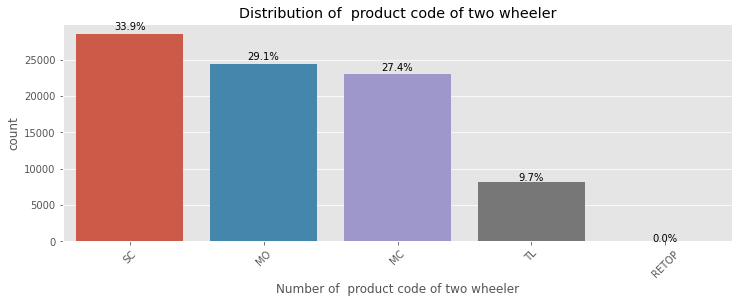

 38%|███▊      | 9/24 [00:00<00:00, 27.81it/s]

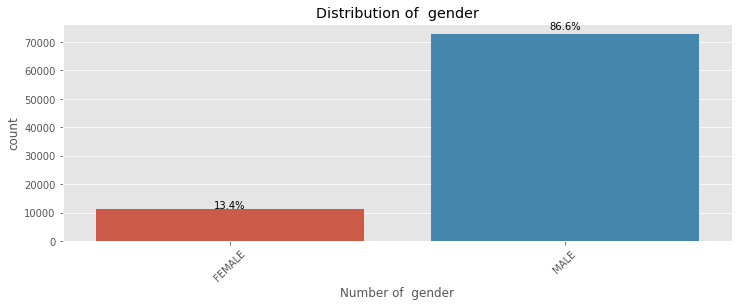

 50%|█████     | 12/24 [00:00<00:00, 22.14it/s]

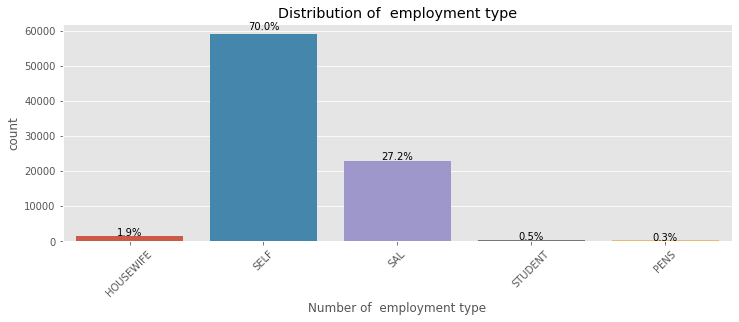

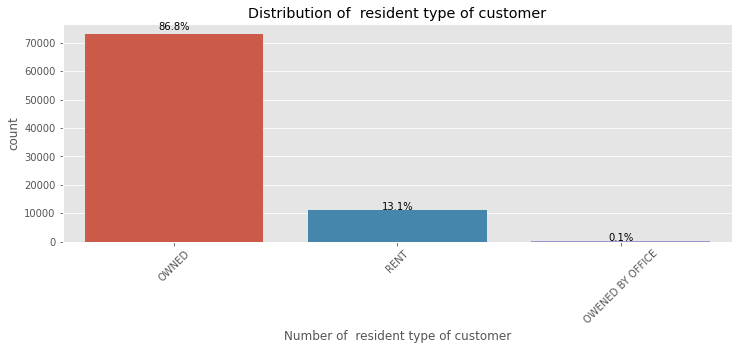

 62%|██████▎   | 15/24 [00:00<00:00, 13.20it/s]

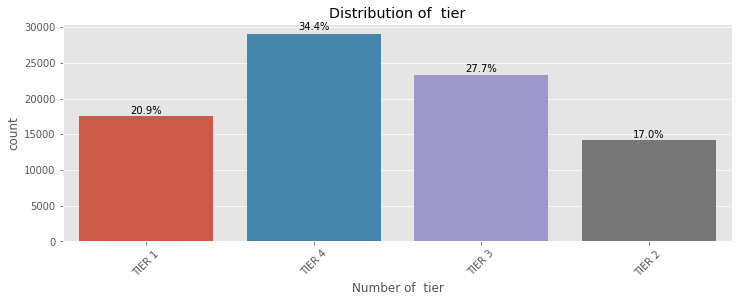

100%|██████████| 24/24 [00:01<00:00, 20.46it/s]


In [16]:
def plotter(df=Loan_renamed,col_name='target_variable'):
    plt.style.use('ggplot')
    plt.figure(figsize=(12,4))
    ax = sns.countplot(x=col_name, data=df)
    plt.title(f"Distribution of  {' '.join(col_name.split('_'))}")
    plt.xlabel(f"Number of  {' '.join(col_name.split('_'))}")
    plt.xticks(rotation=45)
    total = len(Loan_renamed[col_name])
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        percentage = f'{100 * p.get_height()/total:.1f}%'
        x, y = p.get_xy() 
        ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center')


    plt.show()

df = Loan_renamed.drop(columns=['customer_id','date_of_birth'])
for col in tqdm(list(df.columns)):
    if (df[col].dtype=='object'):
        plotter(col_name=col)

Text(0.5, 1, 'Class counts')

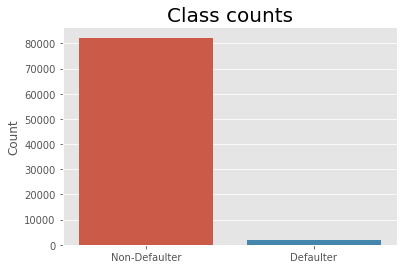

In [17]:
# Getting the number of positive and negative examples. 
sns.countplot(Loan_renamed['target_variable'])
plt.xticks((0, 1), ["Non-Defaulter", "Defaulter"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20})

The data set is pretty imbalanced as expected where positive examples defualters are significanltly less than 25%. We'll explain in the next section how to handle all of them after giving an overview of ensemble methods


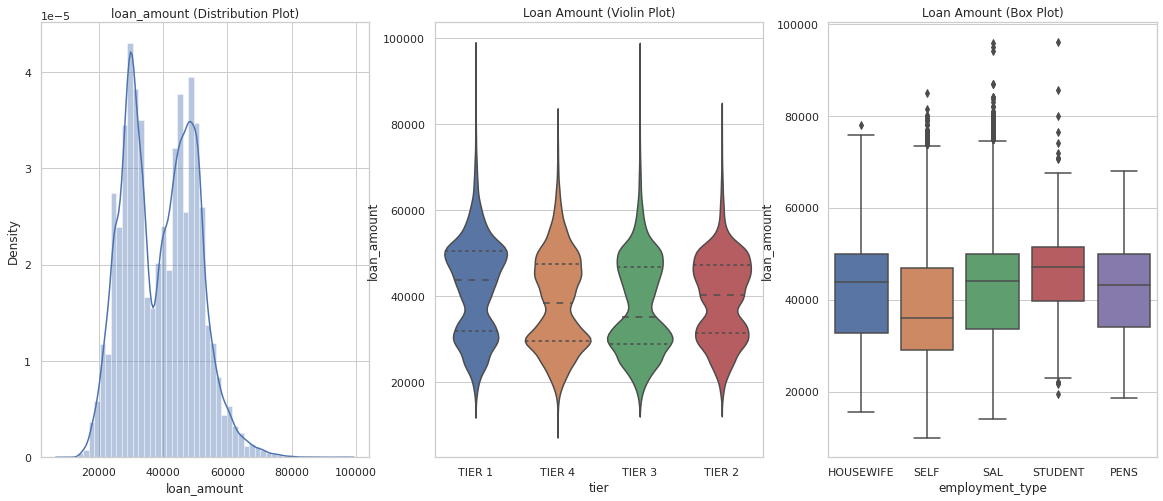

In [18]:
#plotting loan amount
sns.set(style="whitegrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("loan_amount (Distribution Plot)")
sns.distplot(Loan_renamed['loan_amount'],ax=ax[0])
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data =Loan_renamed, x='tier',y='loan_amount',ax=ax[1], inner="quartile")
ax[2].set_title("Loan Amount (Box Plot)")
sns.boxplot(data =Loan_renamed, x='employment_type',y='loan_amount',ax=ax[2],orient='v');

The first plot is a distribution plot consisting of a histogram and a polygon. The plot shows that the loan amount data follows a bimodal distribution. The two modes are unequal and larger mode is the major mode and the other is the minor mode

The second one is a violin plot of tier (Customer's geograhic location) against loan amount. The plots show their 1st quantile, 3rd quantile and median.

The second one is a box plot of Employment type against loan amount. The plots show their 1st quantile, 3rd quantile and median. There are also a number of outliers seen.

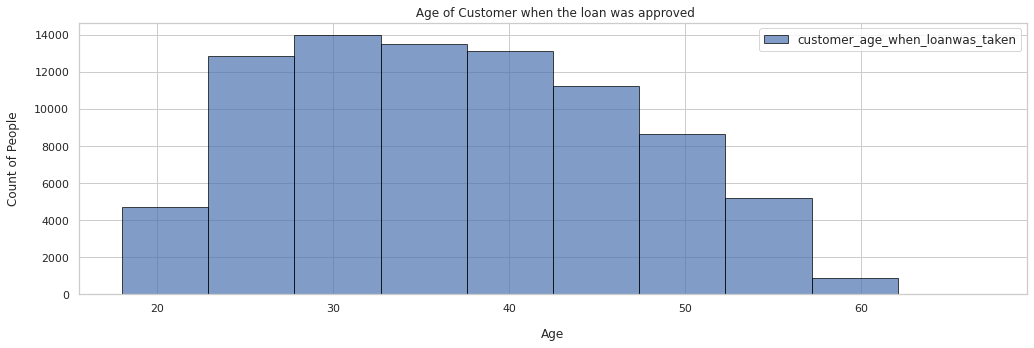

In [19]:
#Age- age at which the client took the loan
plt.figure(figsize=(17,5))

#bar plot
Loan_renamed['customer_age_when_loanwas_taken'].plot(kind='hist',color='b',alpha=0.7, edgecolor='black')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12});

Most people take loans when they in their mid-twenties, thirties and forties.

The older people get, the less loans they take.

## Multivariate Data Analysis

100%|██████████| 24/24 [00:00<00:00, 37.34it/s]


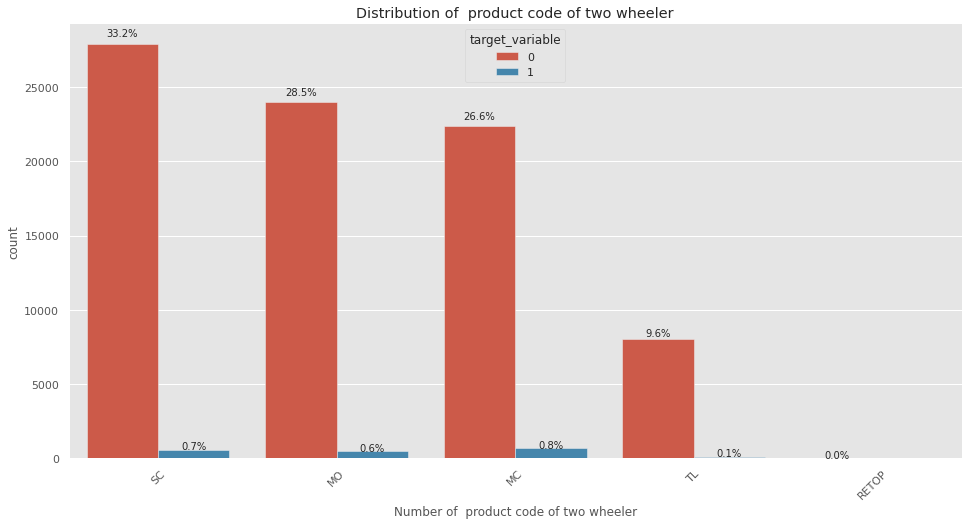

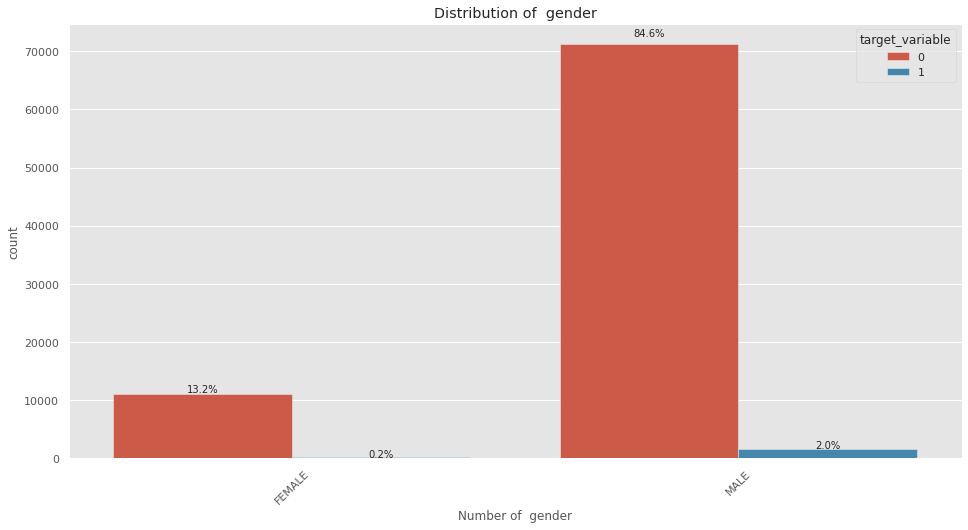

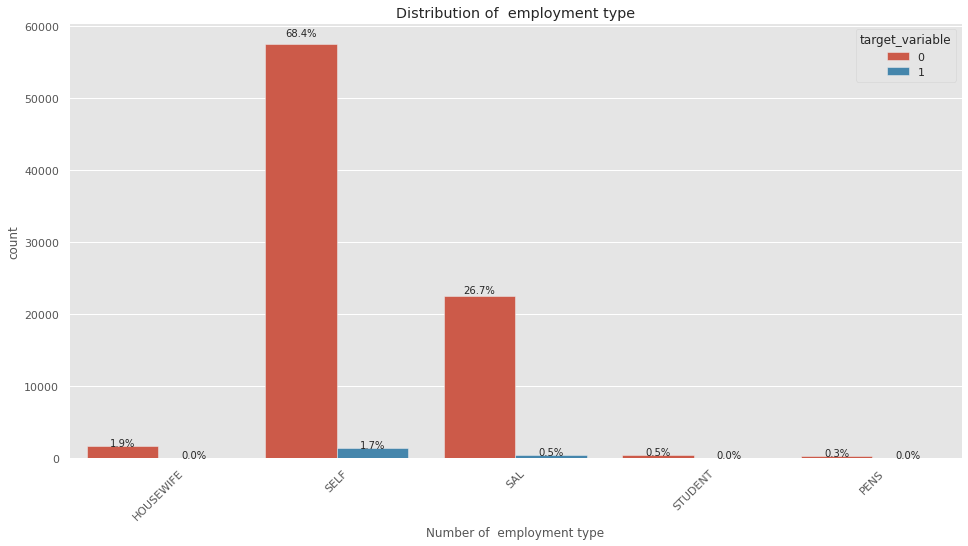

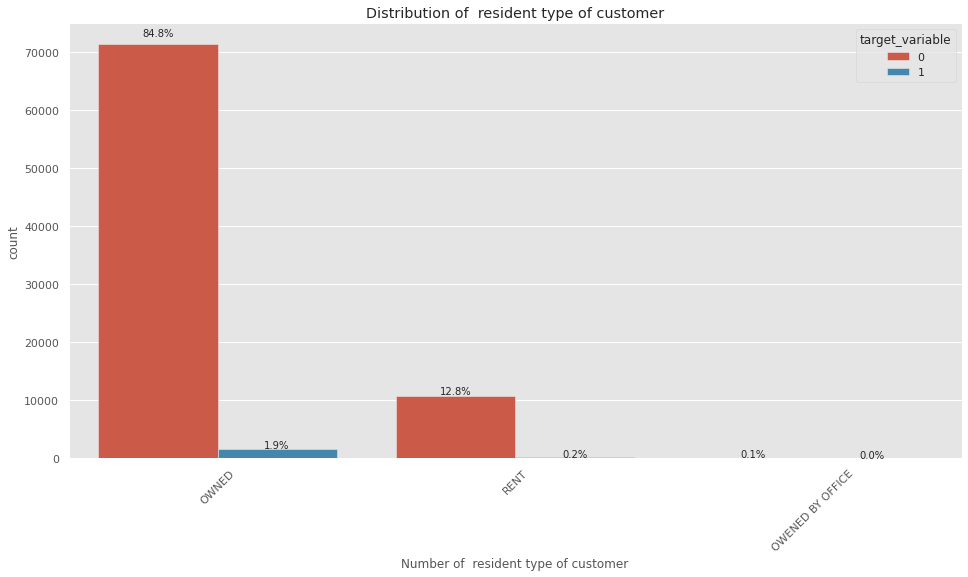

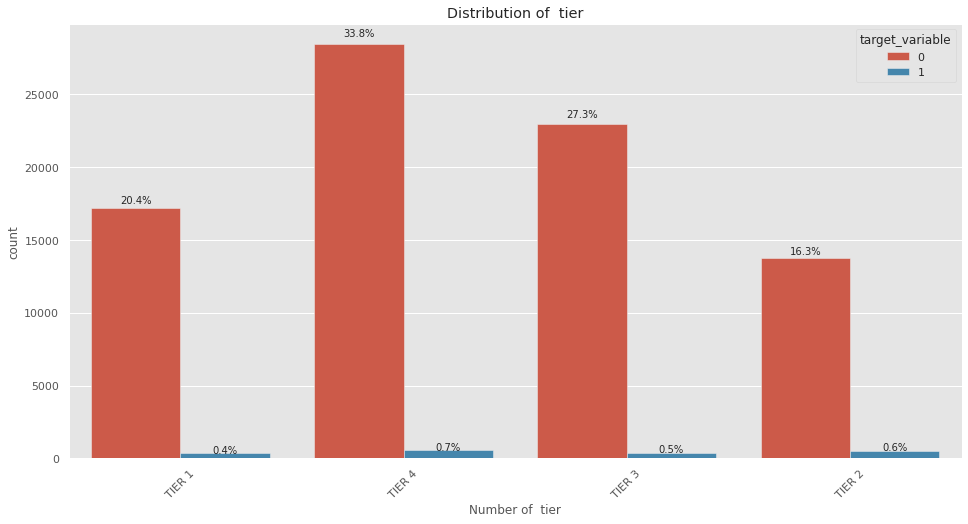

In [20]:
def plotter_multivariate(df=Loan_renamed,col_name='employment_type',hu = 'target_variable'):
  '''
  This function helps plot the counts basing on the bank account variable.

  var df: The specific dataframe used
  var col_name: The variable being used for plotting.
  return object: The sns figure itself. 

  >>> example
  >>> df = 
  '''
  plt.style.use('ggplot')
  plt.figure(figsize=(16,8))
  ax = sns.countplot(x= col_name, hue = hu, data= df)
  # ax = sns.countplot(x=col_name, data=df)
  plt.title(f"Distribution of  {' '.join(col_name.split('_'))}")
  plt.xlabel(f"Number of  {' '.join(col_name.split('_'))}")
  plt.xticks(rotation=45)
  total = len(Loan_renamed[col_name])
  for p in ax.patches:
      width = p.get_width()
      height = p.get_height()
      percentage = f'{100 * p.get_height()/total:.1f}%'
      x, y = p.get_xy() 
      ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center')



plt.show()




df = Loan_renamed.drop(columns=['customer_id','date_of_birth'])
for col in tqdm(list(df.columns)):
    if (df[col].dtype=='object'):
        plotter_multivariate(col_name=col)

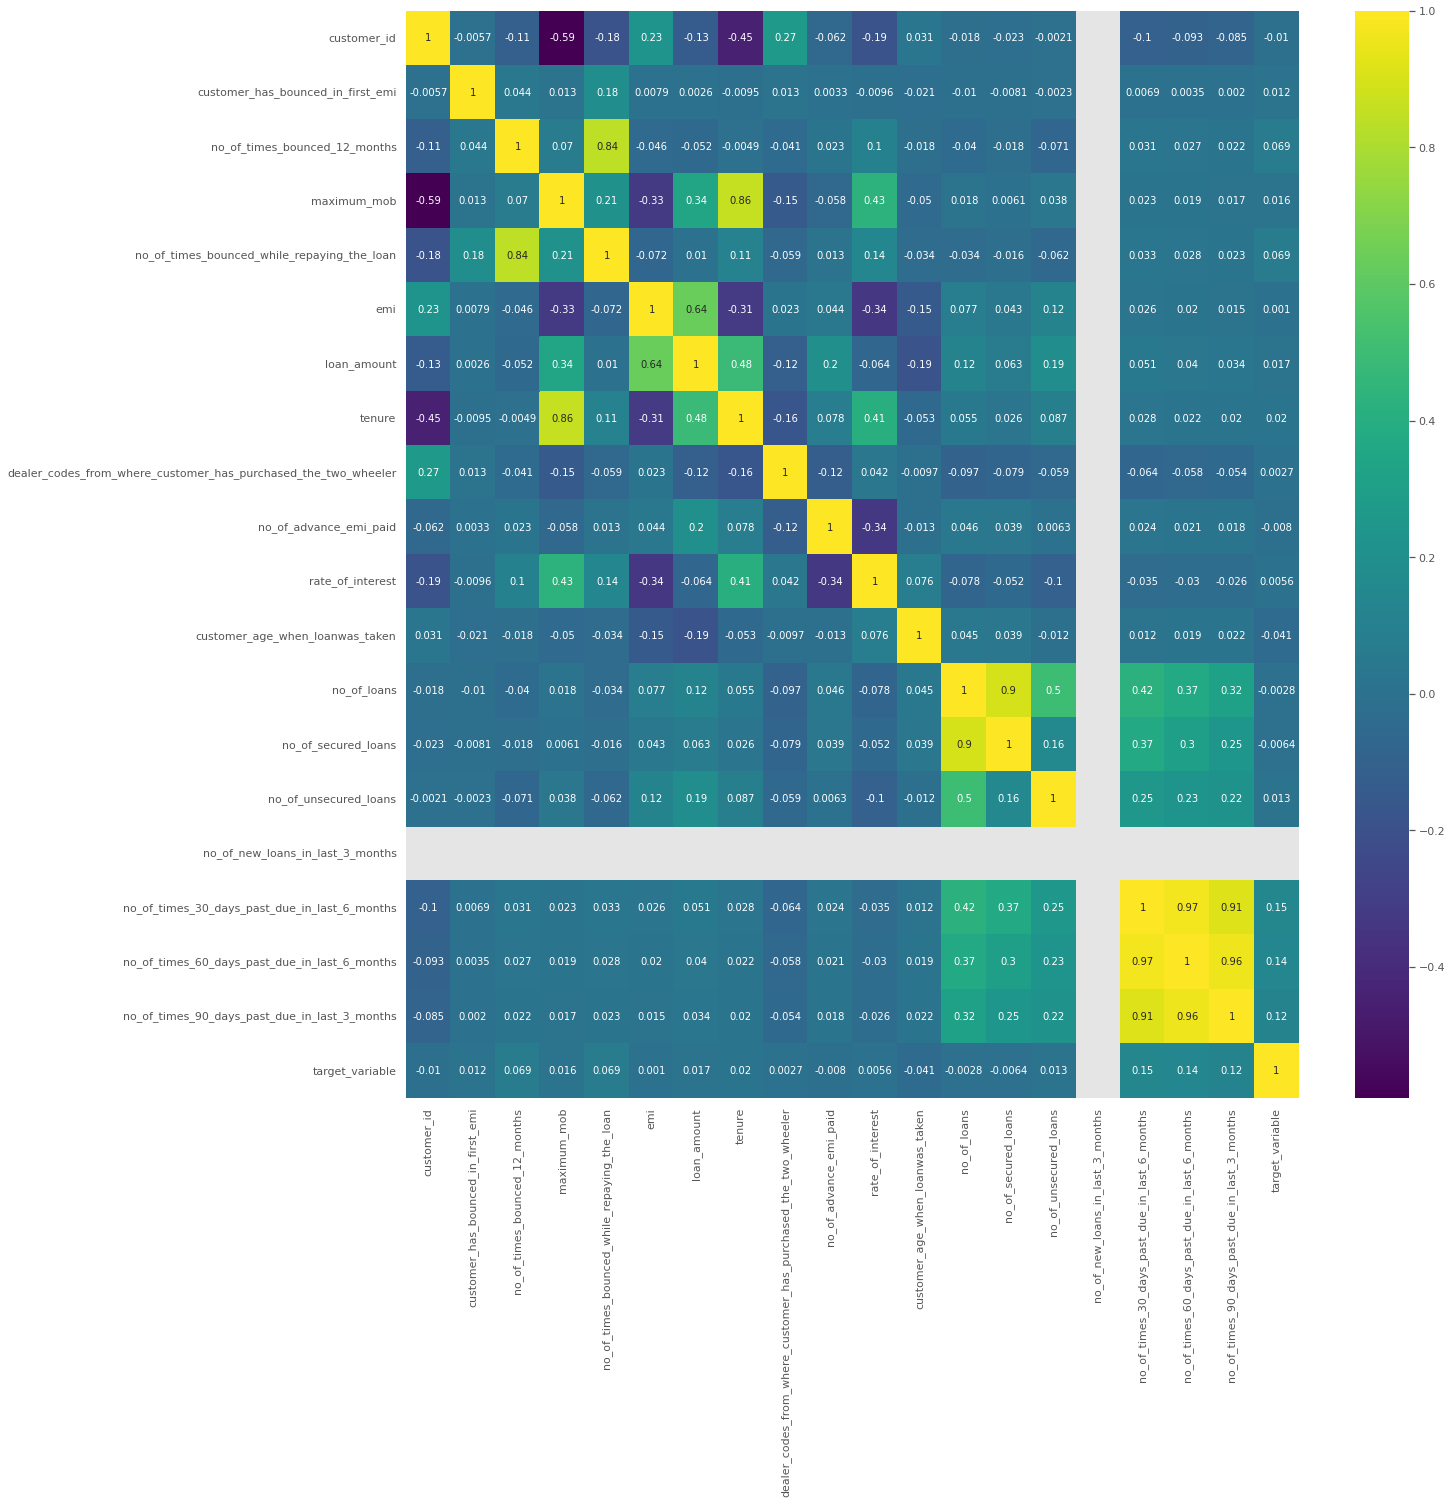

In [21]:
#correlation matrix
corrmat = Loan_renamed.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(Loan_renamed[top_corr_features].corr(),annot=True,cmap="viridis")

A high correlation between dependent and independent variables is desired whereas the high correlation between 2 independent variables is undesired.

## **Data Preparation**

In [22]:
#renaming our data
data=Loan_renamed.copy()

In [23]:
#categorizing variables into categorical and numerical variables
CatVariables = data.select_dtypes(include=['object'])
NumVariables = data.select_dtypes(include=['float','int'])

In [24]:
print(CatVariables)
CatVariables.columns

      product_code_of_two_wheeler  gender  ... date_of_birth    tier
0                              SC  FEMALE  ...    30-05-1974  TIER 1
1                              MO    MALE  ...    01-09-1967  TIER 1
2                              SC    MALE  ...    04-05-1983  TIER 1
3                              SC  FEMALE  ...    10-12-1989  TIER 1
4                              MC    MALE  ...    24-09-1984  TIER 1
...                           ...     ...  ...           ...     ...
85043                          SC    MALE  ...    01-07-1969  TIER 1
85044                          MC    MALE  ...    01-01-1982  TIER 4
85045                          MO  FEMALE  ...    01-01-1971  TIER 2
85046                          SC    MALE  ...    07-11-1961  TIER 3
85047                          MO    MALE  ...    05-08-1981  TIER 4

[84131 rows x 6 columns]


Index(['product_code_of_two_wheeler', 'gender', 'employment_type',
       'resident_type_of_customer', 'date_of_birth', 'tier'],
      dtype='object')

In [25]:
print(NumVariables)
NumVariables.columns

       customer_id  ...  target_variable
0                1  ...                0
1                2  ...                0
2                3  ...                0
3                4  ...                0
4                5  ...                0
...            ...  ...              ...
85043        85044  ...                0
85044        85045  ...                0
85045        85046  ...                0
85046        85047  ...                0
85047        85048  ...                0

[84131 rows x 20 columns]


Index(['customer_id', 'customer_has_bounced_in_first_emi',
       'no_of_times_bounced_12_months', 'maximum_mob',
       'no_of_times_bounced_while_repaying_the_loan', 'emi', 'loan_amount',
       'tenure',
       'dealer_codes_from_where_customer_has_purchased_the_two_wheeler',
       'no_of_advance_emi_paid', 'rate_of_interest',
       'customer_age_when_loanwas_taken', 'no_of_loans', 'no_of_secured_loans',
       'no_of_unsecured_loans', 'no_of_new_loans_in_last_3_months',
       'no_of_times_30_days_past_due_in_last_6_months',
       'no_of_times_60_days_past_due_in_last_6_months',
       'no_of_times_90_days_past_due_in_last_3_months', 'target_variable'],
      dtype='object')

**Encoding**

1. Label encoding 

We can  use  LabelEncoder to encode our variable to numbers. What a label encoder essentially does is that it sees the first value in the column and converts it to 0, next value to 1 and so on.The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship. This approach works reasonably well with tree models

2. One hot encoding 

For categorical variables where no such ordinal relationship exists, the integer/label encoding does not suffice.
In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

So if we have n levels in a category, we will get n-1 features.

In [26]:
# Dealing with categorical columns
# Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in CatVariables:
    data[feature] = le.fit_transform(data[feature].astype(str))


## **Modeling**

In [27]:
X=data.drop(['customer_id','target_variable'],axis=1)
y=data[["target_variable"]]

In [28]:
# print((X.shape, y.shape))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=4, random_state = 10) 
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
yhat = model.predict(x_test)
print(f'Your train accuracy is: {accuracy_score(y_test,yhat)}')

pred_train = model.predict(x_train)
print(f'Your prediction is: {accuracy_score(y_train,pred_train)}')


Your train accuracy is: 0.9769017432646593
Your prediction is: 0.9786385016386205


In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9654875557118344

In [30]:
## Use the confusion matrix to visualize the precision and recall - and understand the effect of class imbalance in prediction
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     24657
           1       0.00      0.00      0.00       583

    accuracy                           0.98     25240
   macro avg       0.49      0.50      0.49     25240
weighted avg       0.95      0.98      0.97     25240

Confusion matrix, without normalization
[[    0   583]
 [    0 24657]]


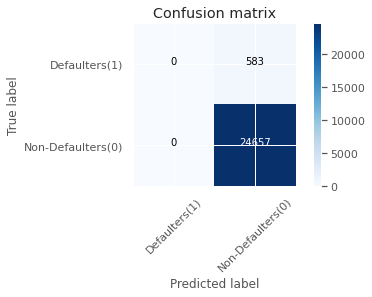

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defaulters(1)','Non-Defaulters(0)'],normalize= False,  title='Confusion matrix')

>  Clearly, the model has not leant enough examples of the default class, thus the predictions are for the non-defualters, and given their numbers, any complete prediction of the non-default class will give a misleading value of the perfomance metric

Yeah looks like we will consider class imbalance handling for better unbiased results : smote , upsampling : rose and all that would be necessary

**SMOTE**

S𝒚𝒏𝒕𝒉𝒆𝒕𝒊𝒄 𝒎𝒊𝒏𝒐𝒓𝒊𝒕𝒚 𝒐𝒗𝒆𝒓𝒔𝒂𝒎𝒑𝒍𝒊𝒏𝒈 𝒕𝒆𝒄𝒉𝒏𝒊𝒒𝒖𝒆- creates examples of the minority class by looking at the distribution of the minority class and "guesses" what the other cases would have been 
- pick two points that are relatively closer to each other distance wise 
-  draw a line 
- generate a new point along that line 

It doesn't always work but a lot of time it works and it is a good technique to look at when there is no way of generating more data and the aforementioned techniques are not applicable per se 
It is better for increasing precision(𝙥𝙤𝙨𝙞𝙩𝙞𝙫𝙚 𝙞𝙙𝙚𝙣𝙩𝙞𝙛𝙞𝙚𝙙 𝙖𝙨 𝒕𝒉𝒂𝒕 𝒂𝒓𝒆 𝒑𝒐𝒔𝒊𝒕𝒊𝒗𝒆 ) but this comes at the cost of recall (𝒐𝒖𝒕 𝒐𝒇 𝒂𝒍𝒍 𝒕𝒉𝒆 𝒑𝒐𝒔𝒊𝒕𝒊𝒗𝒆𝒔 𝒘𝒉𝒊𝒄𝒉 𝒐𝒏𝒆𝒔 𝒉𝒂𝒗𝒆 𝒃𝒆𝒆𝒏 𝒄𝒐𝒓𝒓𝒆𝒄𝒕𝒍𝒚 𝒊𝒅𝒆𝒏𝒕𝒊𝒇𝒊𝒆𝒅)


In [32]:
#pip install -U imbalanced-learn

Shape of X before SMOTE: (84131, 24)
Shape of X after SMOTE: (164580, 24)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54fc100350>]],
      dtype=object)

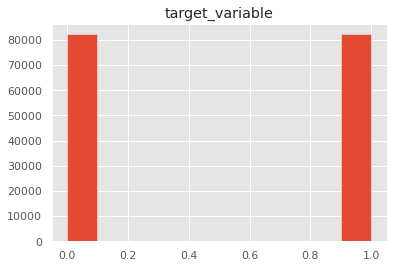

In [33]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote_sample=SMOTE(random_state=124,sampling_strategy='auto') # the sampling strategy can be one of float, str, dict or callable `float``,
#it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling ie {1:500}
# ``'minority'``: resample only  minority class; 'not minority'``:all but the minority class; ``'not majority'``: all but the majority, ``'all'`` ,``'auto'``:
x_res, y_res=smote_sample.fit_resample(X,y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {x_res.shape}''')

#print('\nBalance of positive and negative classes (%):')
#y_res.value_counts(normalize=True) * 100

# now plot the classes
y_res.hist()

With SMOTE we get a feature space with a similar distribution to the original data set, except that in this case we actually have a balanced ratio of the negative and positive examples. Thus our model should be able to learn the patterns associated with both defaults and non-defaults. Here we are interested in both an increase in precision and recall.

In [34]:
print(x_res.shape,y_res.shape)

(164580, 24) (164580, 1)


## Re-Building the algorithm with the balanced data

In [35]:
# print((X.shape, y.shape))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size = 0.3, random_state = 10)

from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=4, random_state = 10) 
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
yhat = model.predict(x_test)
print(f'Your train accuracy is: {accuracy_score(y_test,yhat)}')

pred_train = model.predict(x_train)
print(f'Your prediction is: {accuracy_score(y_train,pred_train)}')

# If you choose class_weight = "balanced", the classes will be weighted inversely proportional to how frequently
#  they appear in the data.

Your train accuracy is: 0.8165228662858994
Your prediction is: 0.8178219884381022


In [36]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8162899492481167

              precision    recall  f1-score   support

           0       0.80      0.85      0.82     24747
           1       0.84      0.78      0.81     24627

    accuracy                           0.82     49374
   macro avg       0.82      0.82      0.82     49374
weighted avg       0.82      0.82      0.82     49374

Confusion matrix, without normalization
[[19248  5379]
 [ 3680 21067]]


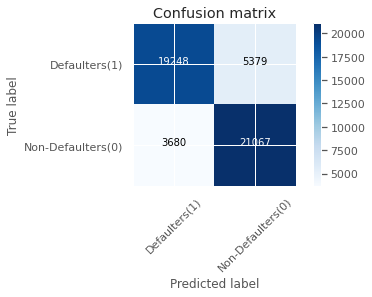

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defaulters(1)','Non-Defaulters(0)'],normalize= False,  title='Confusion matrix')

Using the balanced data we are able to see a more realistic results of the F1 score. As a bank we would be interested in a balanced value of precision and recall.

We want to avail loans to the maximum customer base, thus we want to avoid a situaton where the model would flag an individual as a defaulter when it is the case that they are not. On the other hand we would also want to reduce LGD, Loss Given defautlt, by having a model with a higher recall value, in the sense, that when one applying for a facility is a defaulter, they need to be flagged as such.

## Feature Importance

- This is optional and it is a compensating control to ensure the model is not overlearning on one feauture.

In [38]:
#from sklearn.preprocessing import  RobustScaler, FunctionTransformer
#from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import  RobustScaler, FunctionTransformer
# Build random forest classifier
#rf_clf = RandomForestClassifier(n_estimators=500,
                                #max_features=0.25,
                                #criterion="entropy",
                                #class_weight="balanced")

# fit RF to plot feature importances
#rf_clf.fit(RobustScaler().fit_transform(SimpleImputer(strategy="median").fit_transform(x_train)), y_train)

# Plot features importance
#importances = rf_clf.feature_importances_
#indices = np.argsort(rf_clf.feature_importances_)[::-1]
#plt.figure(figsize=(12, 6))
#plt.bar(range(1, 31), importances[indices], align="center")
#plt.xticks(range(1, 31), data.columns[data.columns != "target_variable"][indices], rotation=90)
#plt.title("Feature Importance", {"fontsize": 16});

NB: The customer_id column should be removed as well. challenge to you


Tuning (it is worth noting that feature engineering is of much importance than hyperparametere tuning as the perfomance  improvement with the latter is always only marginal)

## Challenge:

- Document the workings of random forest.
- Document the understanding and the maths behind feature importance.
- Do a stepwise deletion to identify model improvement based on the inclusion of important features only.
- Document the effect of multicolleaniarity in model performance.

NB: The customer_id column should be removed as well. challenge to you

Tuning (it is worth noting that feature engineering is of much importance than hyperparametere tuning as the perfomance improvement with the latter is always only marginal)

## Generating credit scores

In [39]:
y_hat=model.predict(x_test)
y_hat_2=(model.predict_proba(x_test)[:,1]>0.3).astype(int)
## It is worth noting that one can vary the threshold for default given the lending facility's risk appetite. 
print(f1_score(y_test,y_hat),f1_score(y_test,y_hat_2))

0.8095047839343917 0.816181689141235


In [40]:
from sklearn.metrics import recall_score, precision_score
print(recall_score(y_test,y_hat),recall_score(y_test,y_hat_2))

0.7815811913753198 0.957282657246112


The following forms our basis for rank ordering
- 0 - 200 Bad Customer ,
- 201-350 2nd Worst,
- 351 - 500 Not So bad,
- 501 - 700 Ideal guys,
- 700> Big loans

In [41]:
(model.predict_proba(x_test)[:,1]>0.5).astype(int)

array([1, 0, 1, ..., 0, 0, 1])

In [42]:
(1-model.predict_proba(x_test)[:,1])*1000

array([159.09, 821.43, 499.12, ..., 778.26, 661.82, 208.03])

In [43]:
x_test['score']=(1-model.predict_proba(x_test)[:,1])*1000
x_test['risk']=y_hat

In [44]:
x_test.head(5)

,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,no_of_advance_emi_paid,rate_of_interest,gender,employment_type,resident_type_of_customer,date_of_birth,customer_age_when_loanwas_taken,no_of_loans,no_of_secured_loans,no_of_unsecured_loans,no_of_new_loans_in_last_3_months,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,score,risk
112560,0,0,15.173718,0.826282,2944.639073,45726.282489,18.000000,3506.120433,0,0.0,10.599748,1,3,1,12494,29.305130,1,1,0,0,1,1,0,1,159.092438,1
56599,0,0,23.000000,0.000000,1466.000000,27900.000000,26.000000,8383.000000,4,0.0,16.890000,1,3,1,10096,51.000000,0,0,0,0,0,0,0,3,821.432686,0
23669,0,0,22.000000,0.000000,2725.000000,51900.000000,24.000000,4371.000000,3,0.0,13.000000,1,3,2,2564,35.000000,8,5,2,0,12,9,4,0,499.121768,1
101656,0,0,10.925329,0.358224,2919.403615,33679.111800,12.000000,1392.830622,3,0.0,3.990000,1,2,1,143,26.373354,6,3,2,0,13,12,6,1,234.165162,1
113908,0,1,13.134645,1.000000,3142.407078,40465.406286,14.846193,20567.561909,0,0.0,6.221890,0,2,1,13030,23.846193,1,1,0,0,1,0,0,2,350.192819,1


In [45]:
x_test.tail(5)

,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,no_of_advance_emi_paid,rate_of_interest,gender,employment_type,resident_type_of_customer,date_of_birth,customer_age_when_loanwas_taken,no_of_loans,no_of_secured_loans,no_of_unsecured_loans,no_of_new_loans_in_last_3_months,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,score,risk
29397,1,0,28.0000,3.0000,2424.000000,56700.000000,30.0,3372.000000,3,2.0,11.30,1,3,1,7235,20.0000,10,1,6,0,0,0,0,0,679.267052,0
80670,0,0,6.0000,0.0000,4403.000000,25900.000000,6.0,1816.000000,0,0.0,4.00,1,2,1,1112,25.0000,0,0,0,0,0,0,0,1,746.302369,0
76688,0,0,11.0000,0.0000,2348.000000,24825.000000,12.0,8788.000000,4,0.0,13.49,1,3,1,28,36.0000,0,0,0,0,0,0,0,3,778.255291,0
53486,0,0,20.0000,1.0000,2074.000000,44800.000000,24.0,1740.000000,3,2.0,5.55,0,3,1,10046,28.0000,15,15,0,0,0,0,0,2,661.818712,0
158119,0,0,20.4018,0.2991,3111.254096,61199.099926,24.0,1512.600735,0,1.0,10.99,1,2,1,50,23.8973,1,1,0,0,3,2,0,3,208.032434,1


In [46]:
# Export the model scores result to CSV to be able to perform rank ordering within Excel template provided
x_test.to_csv('credit-risk-scores-vjc.csv')

In [47]:
probs=model.predict_proba(x_train)